
## Assignment 2 Block 3 Complex systems in Bioinformatics Se24
Petko Antonov, Hyunchang Oh

### Task 1
### A) 

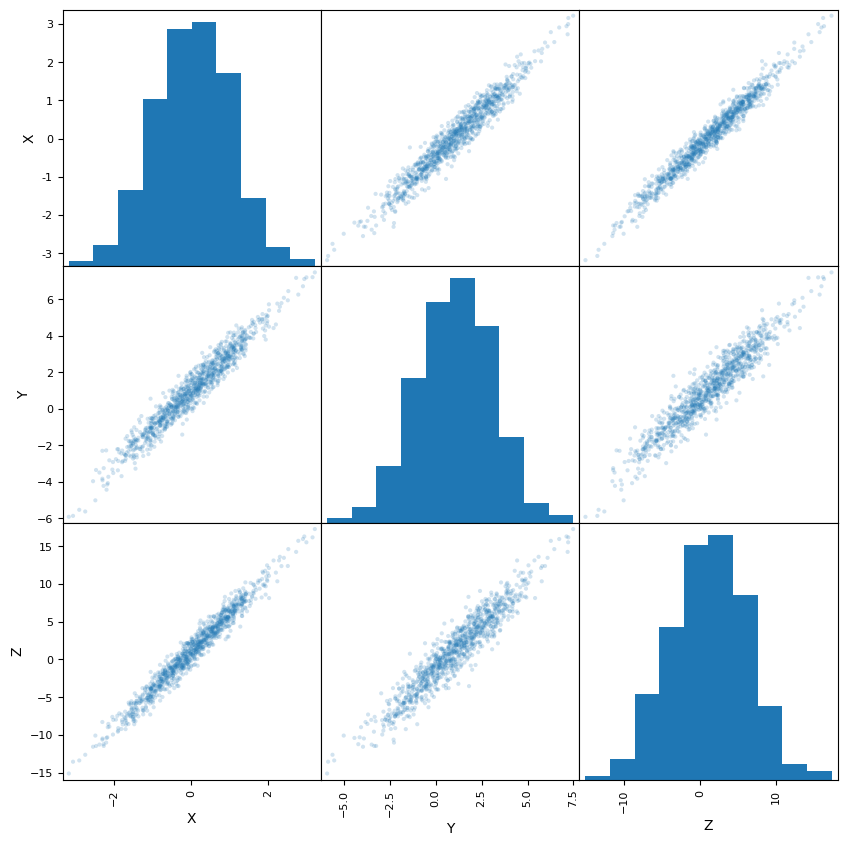

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Number of samples
n = 1000

# Generate samples for X from N(0, 1)
X = np.random.normal(0, 1, n)

# Generate samples for epsilon from N(0, 0.5)
epsilon = np.random.normal(0, 0.5, n)

# Generate samples for Y using the formula Y ~ N(2X + 1, 0.5)
Y = np.random.normal(2 * X + 1, 0.5)

# Generate samples for Z using the formula Z ~ N(5X + 1, 1)
Z = np.random.normal(5 * X + 1, 1)

# Display the first 5 samples of each variable
X[:5], Y[:5], Z[:5]


# Create a DataFrame with the samples
data = pd.DataFrame({'X': X, 'Y': Y, 'Z': Z})

# Create a scatter matrix plot
scatter_matrix(data, alpha=0.2, figsize=(10, 10), diagonal='hist')
plt.show()


  Neither of them look independent


### B)

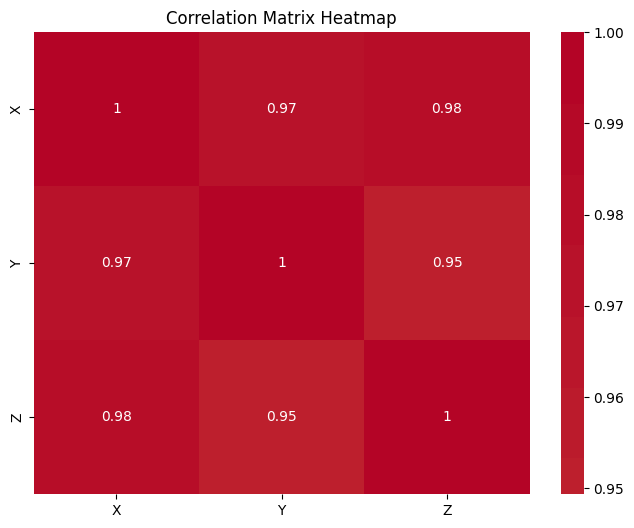

In [2]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


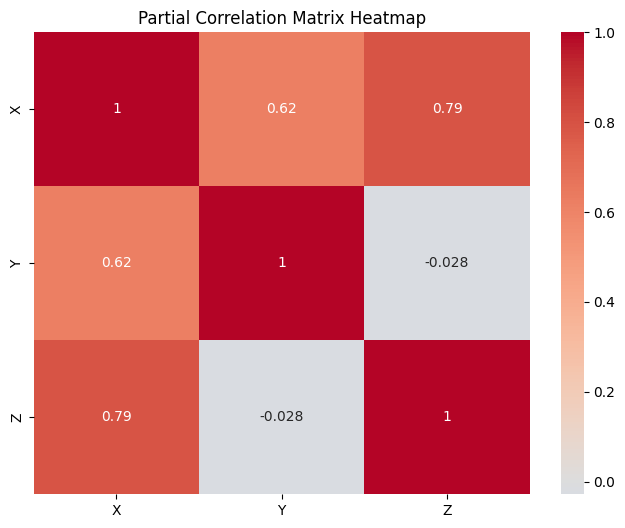

In [3]:
# Compute the covariance matrix
cov_matrix = np.cov(data, rowvar=False)

# Compute the precision matrix (inverse of the covariance matrix)
precision_matrix = np.linalg.inv(cov_matrix)

# Rescale the precision matrix to get the partial correlations
d = np.sqrt(np.diag(precision_matrix))
partial_corr_matrix = -precision_matrix / np.outer(d, d)

# Set the diagonal to 1
np.fill_diagonal(partial_corr_matrix, 1)

# Convert to DataFrame for better visualization
partial_corr_df = pd.DataFrame(partial_corr_matrix, index=data.columns, columns=data.columns)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(partial_corr_df, annot=True, cmap='coolwarm', center=0)
plt.title('Partial Correlation Matrix Heatmap')
plt.show()

We see the partial correlation between Y and Z is the lowest because the are both dependent on X. If we remove that relation the two distributions should not be correlated 
 

### Task 2
### A) and B)

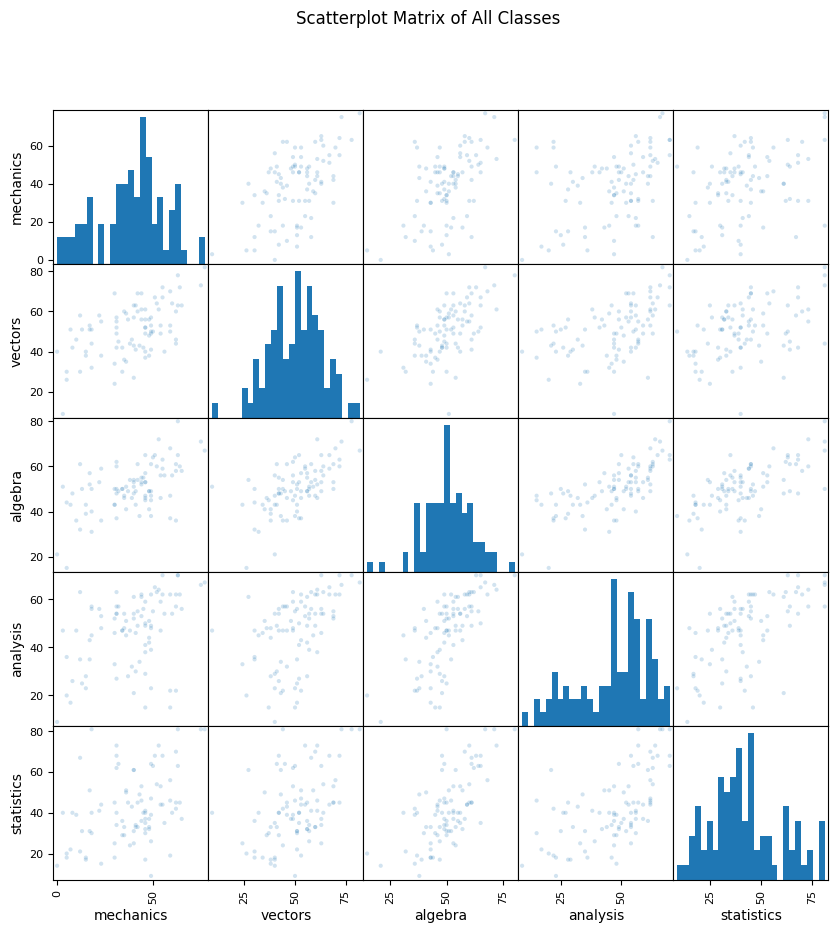

In [20]:
marks_data = pd.read_csv("math_marks.csv").drop(columns=["student_id"])
V =("mechanics", "vectors", "algebra", "analysis", "statistics")

scatter_matrix(marks_data, alpha=0.2, figsize=(10, 10), diagonal='hist', hist_kwds={"bins" : 25})
plt.suptitle('Scatterplot Matrix of All Classes')
plt.show()

We see most notes are resemble a normal distribution but have some skewing and underrepresented bins. In the case of analysis looks more like 2 overlapping normal dist. 
As to the correlation plots we see some correlation in mechanics - vectors and algebra, and algebra - analysis or statistics. There is some weak correlation in most pairs. 

## C)

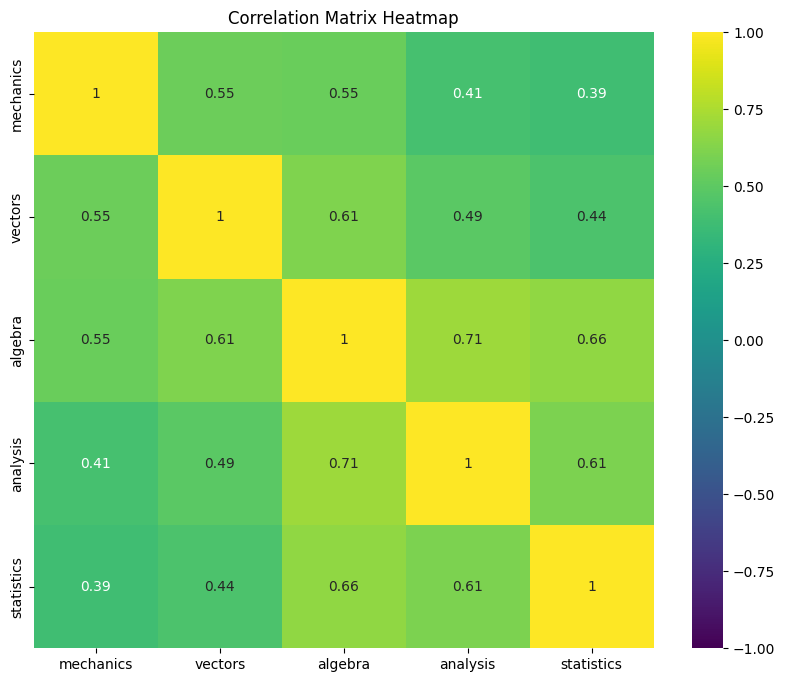

In [23]:
# (C) Calculate the correlation matrix
correlation_matrix = marks_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

## D)

In [24]:

# Calculate the inverse of the correlation matrix
D = np.linalg.inv(correlation_matrix)

# Extract the diagonal entries of the inverse matrix
D_diagonal = np.diag(D)

# Calculate the scores
S = (D_diagonal - 1) / D_diagonal

# Print the scores
print("Scores S:\n", S)

Scores S:
 [0.37560767 0.44478455 0.67117184 0.54086262 0.4793426 ]


## E)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create 5 linear models
models = {}
r2_scores = {}

for target_variable in V:
    # Prepare data for the model
    X = marks_data.drop(target_variable, axis=1)
    y = marks_data[target_variable]
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict the target variable
    y_pred = model.predict(X)
    
    # Calculate R^2 score
    r2 = r2_score(y, y_pred)
    
    # Store the model and R^2 score
    models[target_variable] = model
    r2_scores[target_variable] = r2

# Print R^2 scores
for var, r2 in r2_scores.items():
    print(f"R^2 score for {var}: {r2}")

R^2 score for mechanics: 0.3756076664277902
R^2 score for vectors: 0.44478454798463396
R^2 score for algebra: 0.6711718410270189
R^2 score for analysis: 0.5408626171831167
R^2 score for statistics: 0.4793425958671891


They are somewhat close to the correlation values? 

In [31]:
cov_matrix = marks_data.cov()
precision_matrix = np.linalg.inv(cov_matrix)

# Rescale precision matrix to create matrix K
K = np.zeros_like(precision_matrix)
n = len(V)

for i in range(n):
    for j in range(n):
        if i == j:
            K[i, j] = 1
        else:
            K[i, j] = -precision_matrix[i, j] / np.sqrt(precision_matrix[i, i] * precision_matrix[j, j])

print("Matrix K (rescaled precision matrix):")
# Pretty print the matrix
for i in range(n):
    for j in range(n):
        print(f"{K[i, j]: .3f}", end="\t")
    print()  # Pretty print the matrix

Matrix K (rescaled precision matrix):
 1.000	 0.328	 0.229	-0.001	 0.026	
 0.328	 1.000	 0.282	 0.078	 0.020	
 0.229	 0.282	 1.000	 0.432	 0.357	
-0.001	 0.078	 0.432	 1.000	 0.253	
 0.026	 0.020	 0.357	 0.253	 1.000	


## G)

In [36]:
# Define predictors and response variables for the models
X = marks_data[['algebra', 'analysis', 'statistics']]
Y_mechanics = marks_data['mechanics']
Y_vectors = marks_data['vectors']

# Fit linear models
model_mechanics = LinearRegression()
model_mechanics.fit(X, Y_mechanics)
Y_mechanics_pred = model_mechanics.predict(X)
residuals_mechanics = Y_mechanics - Y_mechanics_pred

model_vectors = LinearRegression()
model_vectors.fit(X, Y_vectors)
Y_vectors_pred = model_vectors.predict(X)
residuals_vectors = Y_vectors - Y_vectors_pred

# Calculate correlation between residuals
correlation_residuals = np.corrcoef(residuals_mechanics, residuals_vectors)[0, 1]

print(f"Correlation between residuals: {correlation_residuals:.3f}")

Correlation between residuals: 0.328


It's the second entry in the K matrix 


## H)

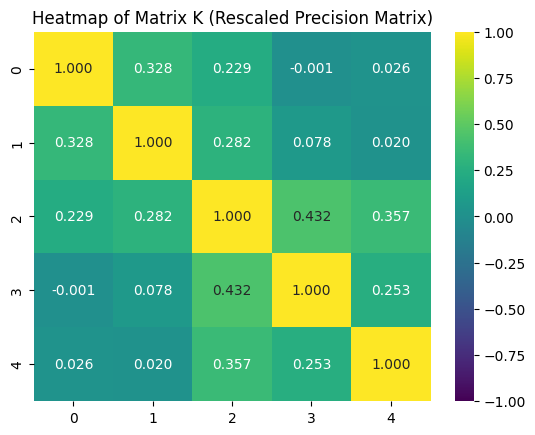

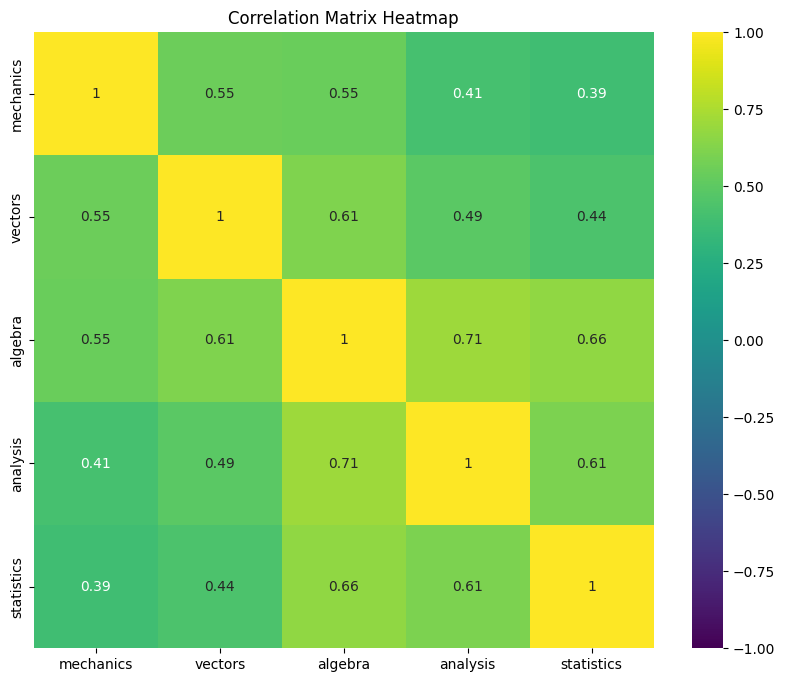

In [38]:
sns.heatmap(K, annot=True, cmap='viridis', vmin=-1, vmax=1, fmt='.3f', annot_kws={"size": 10})
plt.title('Heatmap of Matrix K (Rescaled Precision Matrix)')


correlation_matrix = marks_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Task 3 


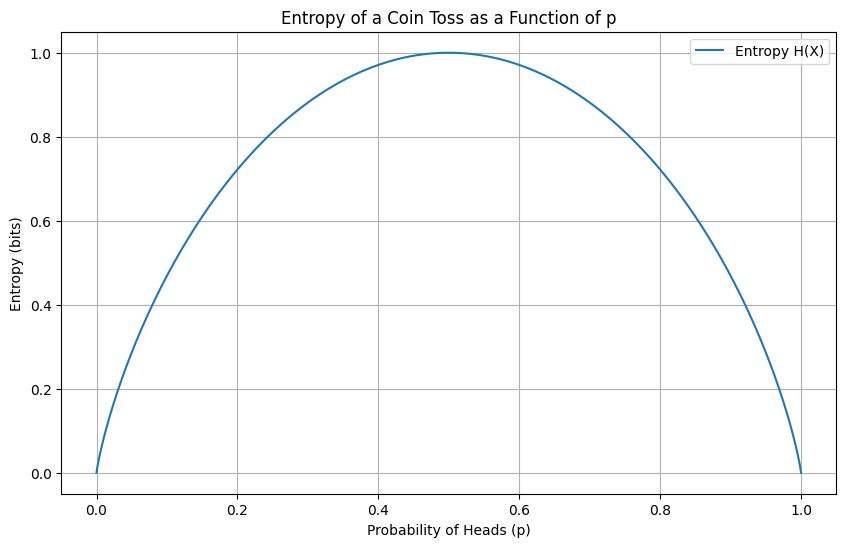

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate entropy
def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Handle the edge cases where log(0) should be 0
def safe_entropy(p):
    if p == 0 or p == 1:
        return 0
    else:
        return entropy(p)

# Generate values for p from 0 to 1
p_values = np.linspace(0, 1, 1000)
entropy_values = [safe_entropy(p) for p in p_values]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(p_values, entropy_values, label='Entropy H(X)')
plt.xlabel('Probability of Heads (p)')
plt.ylabel('Entropy (bits)')
plt.title('Entropy of a Coin Toss as a Function of p')
plt.legend()
plt.grid(True)
plt.show()


## C) 
If the Entropy of a single coint toss is maximum 1, then the entropy of 5 independent trials (assumin 0.5 distribution) should be 5 bits.

This a ligns with an explaination of Sahnnon entropy I found online: "Shannon information is the minimal number of binary questions
needed to determine the outcome of a discrete random event." 5 independent tosses should be 5 binary questions. It makes sense for the case p=1 meaning we are sure all 5 will be heads. 

For p=0.8 however it comes to be something like 5 x 0.22 so about 1.1 bits? Not sure how to interpret...